In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing 
import math
from matplotlib import rcParams
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 10,7

In [2]:
# import data
df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
for i in df.columns:
    print(i)
    print(df[i].describe())
    print()

age
count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

sex
count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

cp
count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

trestbps
count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

chol
count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

fbs
count    303.000000
mean       

In [4]:
X = df[df.columns[:-1]]
y = df.target

X = pd.DataFrame(preprocessing.scale(X), columns=X.columns)


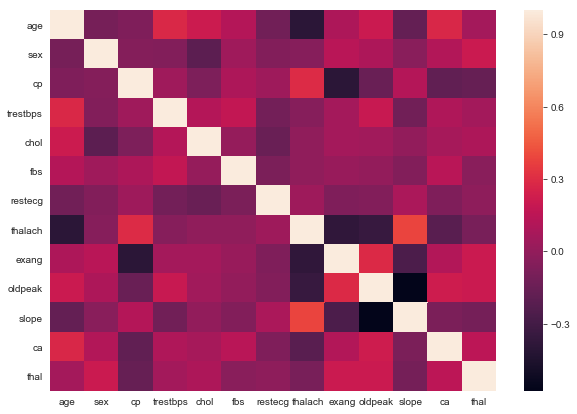

In [17]:
# heatmap with correlation 
corrmat = X.corr()
sns.heatmap(corrmat)
plt.show()

In [6]:
# Store scores
log_scores = []

for i in range(1,10000, 100):
    # initialize Logistic Regression
    logreg = linear_model.LogisticRegression(C=i)

    # Fit the model
    logreg.fit(X, y)

    # Score with 10=k folds
    logreg_score = cross_val_score(logreg, X, y, cv= 10)
    coef = logreg.coef_
    intercept = logreg.intercept_
    print('C:', i)
    print('All R-Squares:', logreg_score)
    print('R-Squared:', logreg_score.mean())
    print('intercept:', intercept)
    log_scores.append((logreg_score.mean(), i))
    print()

    # Display feature coefficients
    coef_df = pd.DataFrame(X.columns)
    coef_df.columns = ['Features']
    coef_df['Coef'] = coef.reshape(-1,1)
    print(coef_df)

C: 1
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.72413793]
R-Squared: 0.8138524286243974
intercept: [0.12122145]

    Features      Coef
0        age -0.053454
1        sex -0.768520
2         cp  0.843238
3   trestbps -0.318982
4       chol -0.218183
5        fbs  0.013259
6    restecg  0.232469
7    thalach  0.505142
8      exang -0.450460
9    oldpeak -0.599685
10     slope  0.343769
11        ca -0.752978
12      thal -0.531193
C: 101
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [0.11654136]

    Features      Coef
0        age -0.044618
1        sex -0.817411
2         cp  0.885481
3   trestbps -0.340773
4       chol -0.239347
5        fbs  0.012422
6    restecg  0.244663
7    thalach  0.530448
8      exang -0.459525
9    oldpeak -0.625990
10     slope  0.356221
11        ca -0.789120
1

12      thal -0.550382
C: 1601
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [0.1164875]

    Features      Coef
0        age -0.044521
1        sex -0.817922
2         cp  0.885918
3   trestbps -0.341001
4       chol -0.239573
5        fbs  0.012410
6    restecg  0.244790
7    thalach  0.530719
8      exang -0.459618
9    oldpeak -0.626261
10     slope  0.356351
11        ca -0.789494
12      thal -0.550383
C: 1701
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [0.11648729]

    Features      Coef
0        age -0.044521
1        sex -0.817925
2         cp  0.885920
3   trestbps -0.341002
4       chol -0.239574
5        fbs  0.012410
6    restecg  0.244790
7    thalach  0.530720
8      exang -0.459618
9    oldpeak -0.626262
10     slope  0.35635

C: 3201
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [0.11648569]

    Features      Coef
0        age -0.044518
1        sex -0.817940
2         cp  0.885933
3   trestbps -0.341009
4       chol -0.239580
5        fbs  0.012410
6    restecg  0.244794
7    thalach  0.530728
8      exang -0.459621
9    oldpeak -0.626270
10     slope  0.356355
11        ca -0.789507
12      thal -0.550389
C: 3301
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [0.11648563]

    Features      Coef
0        age -0.044518
1        sex -0.817940
2         cp  0.885933
3   trestbps -0.341009
4       chol -0.239581
5        fbs  0.012410
6    restecg  0.244794
7    thalach  0.530728
8      exang -0.459621
9    oldpeak -0.626270
10     slope  0.356355
11        ca -0.7895

C: 4801
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [0.11648508]

    Features      Coef
0        age -0.044517
1        sex -0.817945
2         cp  0.885938
3   trestbps -0.341011
4       chol -0.239583
5        fbs  0.012410
6    restecg  0.244795
7    thalach  0.530731
8      exang -0.459622
9    oldpeak -0.626273
10     slope  0.356357
11        ca -0.789511
12      thal -0.550392
C: 4901
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [0.11648506]

    Features      Coef
0        age -0.044517
1        sex -0.817946
2         cp  0.885938
3   trestbps -0.341012
4       chol -0.239583
5        fbs  0.012410
6    restecg  0.244795
7    thalach  0.530731
8      exang -0.459622
9    oldpeak -0.626273
10     slope  0.356357
11        ca -0.7895

C: 6401
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [0.11648478]

    Features      Coef
0        age -0.044516
1        sex -0.817948
2         cp  0.885940
3   trestbps -0.341013
4       chol -0.239584
5        fbs  0.012410
6    restecg  0.244796
7    thalach  0.530732
8      exang -0.459622
9    oldpeak -0.626274
10     slope  0.356357
11        ca -0.789513
12      thal -0.550393
C: 6501
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [0.11648477]

    Features      Coef
0        age -0.044516
1        sex -0.817948
2         cp  0.885940
3   trestbps -0.341013
4       chol -0.239584
5        fbs  0.012410
6    restecg  0.244796
7    thalach  0.530732
8      exang -0.459623
9    oldpeak -0.626274
10     slope  0.356357
11        ca -0.7895

C: 8001
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [0.1164846]

    Features      Coef
0        age -0.044516
1        sex -0.817950
2         cp  0.885942
3   trestbps -0.341013
4       chol -0.239585
5        fbs  0.012410
6    restecg  0.244796
7    thalach  0.530733
8      exang -0.459623
9    oldpeak -0.626275
10     slope  0.356358
11        ca -0.789514
12      thal -0.550393
C: 8101
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [0.11648459]

    Features      Coef
0        age -0.044516
1        sex -0.817950
2         cp  0.885942
3   trestbps -0.341013
4       chol -0.239585
5        fbs  0.012410
6    restecg  0.244796
7    thalach  0.530733
8      exang -0.459623
9    oldpeak -0.626275
10     slope  0.356358
11        ca -0.78951

C: 9601
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [0.11648448]

    Features      Coef
0        age -0.044516
1        sex -0.817951
2         cp  0.885943
3   trestbps -0.341014
4       chol -0.239586
5        fbs  0.012410
6    restecg  0.244797
7    thalach  0.530734
8      exang -0.459623
9    oldpeak -0.626276
10     slope  0.356358
11        ca -0.789515
12      thal -0.550394
C: 9701
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [0.11648447]

    Features      Coef
0        age -0.044516
1        sex -0.817951
2         cp  0.885943
3   trestbps -0.341014
4       chol -0.239586
5        fbs  0.012410
6    restecg  0.244797
7    thalach  0.530734
8      exang -0.459623
9    oldpeak -0.626276
10     slope  0.356358
11        ca -0.7895

In [7]:
# Store scores 
ridge_scores = []

# initialize ridge
for i in range(1,50):
    ridge = linear_model.LogisticRegression(penalty='l2', C=i)

    # Fit lasso
    ridge.fit(X, y)

    # test and look at scores
    ridge_score = cross_val_score(ridge, X, y, cv=10)

    print('Iteration:', i, '\nC of:', i)
    print('All Scores:', ridge_score)
    print('score:', ridge_score.mean())
    print('intercept:', ridge.intercept_)
    print()
    ridge_scores.append((ridge_score.mean(), i))
    coef_df = pd.DataFrame(X.columns)
    coef_df.columns = ['Features']
    coef_df['Coef'] = ridge.coef_.reshape(-1,1)
    print(coef_df)
    print()

Iteration: 1 
C of: 1
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.72413793]
score: 0.8138524286243974
intercept: [0.12122145]

    Features      Coef
0        age -0.053454
1        sex -0.768520
2         cp  0.843238
3   trestbps -0.318982
4       chol -0.218183
5        fbs  0.013259
6    restecg  0.232469
7    thalach  0.505142
8      exang -0.450460
9    oldpeak -0.599685
10     slope  0.343769
11        ca -0.752978
12      thal -0.531193

Iteration: 2 
C of: 2
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.72413793]
score: 0.8138524286243974
intercept: [0.11910117]

    Features      Coef
0        age -0.049319
1        sex -0.791899
2         cp  0.863542
3   trestbps -0.329397
4       chol -0.228200
5        fbs  0.012916
6    restecg  0.238322
7    thalach  0.517117
8      exang -0.454857
9    oldpeak -0.612374
10     slope  0.349734
11   

Iteration: 18 
C of: 18
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
score: 0.8104041527623286
intercept: [0.11680326]

    Features      Coef
0        age -0.045087
1        sex -0.814911
2         cp  0.883341
3   trestbps -0.339658
4       chol -0.238245
5        fbs  0.012476
6    restecg  0.244044
7    thalach  0.529129
8      exang -0.459073
9    oldpeak -0.624667
10     slope  0.355586
11        ca -0.787292
12      thal -0.549235

Iteration: 19 
C of: 19
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
score: 0.8104041527623286
intercept: [0.11678664]

    Features      Coef
0        age -0.045057
1        sex -0.815070
2         cp  0.883477
3   trestbps -0.339729
4       chol -0.238315
5        fbs  0.012472
6    restecg  0.244083
7    thalach  0.529213
8      exang -0.459102
9    oldpeak -0.624751
10     slope  0.355627
1

Iteration: 34 
C of: 34
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
score: 0.8104041527623286
intercept: [0.11665392]

    Features      Coef
0        age -0.044819
1        sex -0.816339
2         cp  0.884564
3   trestbps -0.340295
4       chol -0.238874
5        fbs  0.012445
6    restecg  0.244398
7    thalach  0.529883
8      exang -0.459332
9    oldpeak -0.625423
10     slope  0.355949
11        ca -0.788337
12      thal -0.549780

Iteration: 35 
C of: 35
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
score: 0.8104041527623286
intercept: [0.11664909]

    Features      Coef
0        age -0.044810
1        sex -0.816385
2         cp  0.884603
3   trestbps -0.340315
4       chol -0.238895
5        fbs  0.012444
6    restecg  0.244409
7    thalach  0.529907
8      exang -0.459340
9    oldpeak -0.625448
10     slope  0.355961
1

In [8]:
# initialize lasso
lasso_scores = []

for i in range(1,50):
    lasso = linear_model.LogisticRegression(penalty='l1', C=i/10)

    # Fit lasso
    lasso.fit(X, y)

    # test and look at scores
    
    lasso_score = cross_val_score(lasso, X, y, cv=10)
    print('iteration:', i, '\nC of:', i/10)
    print('All Scores:', lasso_score)
    print('score:', lasso_score.mean())
    print('intercept:', lasso.intercept_)
    print('number of features retained:', (lasso.coef_ != 0).sum())
    print()
    lasso_scores.append((lasso_score.mean(), i))
    coef_df = pd.DataFrame(X.columns)
    coef_df.columns = ['Features']
    coef_df['Coef'] = lasso.coef_.reshape(-1,1)
    print(coef_df)
    print()

iteration: 1 
C of: 0.1
All Scores: [0.87096774 0.77419355 0.83870968 0.90322581 0.83870968 0.8
 0.9        0.93333333 0.68965517 0.72413793]
score: 0.8272932888394513
intercept: [0.]
number of features retained: 10

    Features      Coef
0        age  0.000000
1        sex -0.342709
2         cp  0.543118
3   trestbps -0.067958
4       chol  0.000000
5        fbs  0.000000
6    restecg  0.036036
7    thalach  0.325711
8      exang -0.330593
9    oldpeak -0.467090
10     slope  0.148690
11        ca -0.495868
12      thal -0.336442

iteration: 2 
C of: 0.2
All Scores: [0.87096774 0.77419355 0.83870968 0.87096774 0.87096774 0.8
 0.9        0.9        0.68965517 0.72413793]
score: 0.8239599555061178
intercept: [0.02826537]
number of features retained: 11

    Features      Coef
0        age  0.000000
1        sex -0.499694
2         cp  0.672227
3   trestbps -0.178954
4       chol -0.059851
5        fbs  0.000000
6    restecg  0.124043
7    thalach  0.405820
8      exang -0.374135
9    

iteration: 16 
C of: 1.6
All Scores: [0.87096774 0.80645161 0.83870968 0.87096774 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.72413793]
score: 0.8106266221727845
intercept: [0.10322912]
number of features retained: 12

    Features      Coef
0        age -0.034598
1        sex -0.762152
2         cp  0.851608
3   trestbps -0.314081
4       chol -0.210311
5        fbs  0.000000
6    restecg  0.224936
7    thalach  0.510826
8      exang -0.442994
9    oldpeak -0.610332
10     slope  0.332715
11        ca -0.756693
12      thal -0.531153

iteration: 17 
C of: 1.7
All Scores: [0.87096774 0.80645161 0.83870968 0.87096774 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.72413793]
score: 0.8106266221727845
intercept: [0.10403699]
number of features retained: 12

    Features      Coef
0        age -0.035332
1        sex -0.765279
2         cp  0.853701
3   trestbps -0.315485
4       chol -0.211886
5        fbs  0.000000
6    restecg  0.226028
7    thalach  0.511746
8   

intercept: [0.10928708]
number of features retained: 12

    Features      Coef
0        age -0.038908
1        sex -0.787711
2         cp  0.868790
3   trestbps -0.326185
4       chol -0.223974
5        fbs  0.000000
6    restecg  0.234225
7    thalach  0.520397
8      exang -0.450387
9    oldpeak -0.618646
10     slope  0.343006
11        ca -0.771398
12      thal -0.541152

iteration: 32 
C of: 3.2
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
score: 0.8104041527623286
intercept: [0.10941947]
number of features retained: 12

    Features      Coef
0        age -0.038867
1        sex -0.788580
2         cp  0.869392
3   trestbps -0.326662
4       chol -0.224496
5        fbs  0.000000
6    restecg  0.234560
7    thalach  0.520929
8      exang -0.450568
9    oldpeak -0.618861
10     slope  0.343300
11        ca -0.771922
12      thal -0.541500

iteration: 33 
C of: 3.3
All Scores: [0.87096774 0.80645161 0.83

    Features      Coef
0        age -0.040564
1        sex -0.797307
2         cp  0.874366
3   trestbps -0.330905
4       chol -0.228986
5        fbs  0.003423
6    restecg  0.237608
7    thalach  0.523786
8      exang -0.453252
9    oldpeak -0.621076
10     slope  0.347204
11        ca -0.777127
12      thal -0.544197

iteration: 47 
C of: 4.7
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
score: 0.8104041527623286
intercept: [0.11168896]
number of features retained: 13

    Features      Coef
0        age -0.041004
1        sex -0.797636
2         cp  0.874574
3   trestbps -0.330954
4       chol -0.228998
5        fbs  0.003611
6    restecg  0.237753
7    thalach  0.523741
8      exang -0.453443
9    oldpeak -0.621395
10     slope  0.347178
11        ca -0.777295
12      thal -0.544326

iteration: 48 
C of: 4.8
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.866

In [9]:
print('Vanilla Logistic Regression:', logreg_score.mean())
print('Ridge Regression:', ridge_score.mean())
print('Lasso Regression:', lasso_score.mean())

Vanilla Logistic Regression: 0.8104041527623286
Ridge Regression: 0.8104041527623286
Lasso Regression: 0.8104041527623286


In [10]:
c_range = [.01, .1, .25, .5, .75, 1, 10]

print('C\tMean Score\tFeatures Left')
for c in c_range:
    lasso = linear_model.LogisticRegression(penalty='l1', C=c)
    lasso.fit(X, y)
    mean_score = cross_val_score(ridge, X, y, cv=10).mean()
    feat_left = (lasso.coef_ != 0).sum()

    print(c, '\t', mean_score, '\t', feat_left)

C	Mean Score	Features Left
0.01 	 0.8104041527623286 	 0
0.1 	 0.8104041527623286 	 10
0.25 	 0.8104041527623286 	 11
0.5 	 0.8104041527623286 	 12
0.75 	 0.8104041527623286 	 12
1 	 0.8104041527623286 	 12
10 	 0.8104041527623286 	 13


In [11]:
print(len(log_scores))
print(len(ridge_scores))
print(len(lasso_scores))

100
49
49


In [12]:
log_scores

[(0.8138524286243974, 1),
 (0.8104041527623286, 101),
 (0.8104041527623286, 201),
 (0.8104041527623286, 301),
 (0.8104041527623286, 401),
 (0.8104041527623286, 501),
 (0.8104041527623286, 601),
 (0.8104041527623286, 701),
 (0.8104041527623286, 801),
 (0.8104041527623286, 901),
 (0.8104041527623286, 1001),
 (0.8104041527623286, 1101),
 (0.8104041527623286, 1201),
 (0.8104041527623286, 1301),
 (0.8104041527623286, 1401),
 (0.8104041527623286, 1501),
 (0.8104041527623286, 1601),
 (0.8104041527623286, 1701),
 (0.8104041527623286, 1801),
 (0.8104041527623286, 1901),
 (0.8104041527623286, 2001),
 (0.8104041527623286, 2101),
 (0.8104041527623286, 2201),
 (0.8104041527623286, 2301),
 (0.8104041527623286, 2401),
 (0.8104041527623286, 2501),
 (0.8104041527623286, 2601),
 (0.8104041527623286, 2701),
 (0.8104041527623286, 2801),
 (0.8104041527623286, 2901),
 (0.8104041527623286, 3001),
 (0.8104041527623286, 3101),
 (0.8104041527623286, 3201),
 (0.8104041527623286, 3301),
 (0.8104041527623286, 3401

In [13]:
ridge_scores

[(0.8138524286243974, 1),
 (0.8138524286243974, 2),
 (0.8104041527623286, 3),
 (0.8104041527623286, 4),
 (0.8104041527623286, 5),
 (0.8104041527623286, 6),
 (0.8104041527623286, 7),
 (0.8104041527623286, 8),
 (0.8104041527623286, 9),
 (0.8104041527623286, 10),
 (0.8104041527623286, 11),
 (0.8104041527623286, 12),
 (0.8104041527623286, 13),
 (0.8104041527623286, 14),
 (0.8104041527623286, 15),
 (0.8104041527623286, 16),
 (0.8104041527623286, 17),
 (0.8104041527623286, 18),
 (0.8104041527623286, 19),
 (0.8104041527623286, 20),
 (0.8104041527623286, 21),
 (0.8104041527623286, 22),
 (0.8104041527623286, 23),
 (0.8104041527623286, 24),
 (0.8104041527623286, 25),
 (0.8104041527623286, 26),
 (0.8104041527623286, 27),
 (0.8104041527623286, 28),
 (0.8104041527623286, 29),
 (0.8104041527623286, 30),
 (0.8104041527623286, 31),
 (0.8104041527623286, 32),
 (0.8104041527623286, 33),
 (0.8104041527623286, 34),
 (0.8104041527623286, 35),
 (0.8104041527623286, 36),
 (0.8104041527623286, 37),
 (0.810404

In [14]:
lasso_scores

[(0.8272932888394513, 1),
 (0.8239599555061178, 2),
 (0.8207341490545049, 3),
 (0.8174008157211716, 4),
 (0.8140674823878383, 5),
 (0.8140674823878383, 6),
 (0.8074008157211716, 7),
 (0.8074008157211716, 8),
 (0.8106266221727845, 9),
 (0.8106266221727845, 10),
 (0.8106266221727845, 11),
 (0.8106266221727845, 12),
 (0.8106266221727845, 13),
 (0.8072932888394512, 14),
 (0.8072932888394512, 15),
 (0.8106266221727845, 16),
 (0.8106266221727845, 17),
 (0.8106266221727845, 18),
 (0.8071783463107156, 19),
 (0.8071783463107156, 20),
 (0.8071783463107156, 21),
 (0.8071783463107156, 22),
 (0.8071783463107156, 23),
 (0.8071783463107156, 24),
 (0.8071783463107156, 25),
 (0.8071783463107156, 26),
 (0.8104041527623286, 27),
 (0.8104041527623286, 28),
 (0.8104041527623286, 29),
 (0.8104041527623286, 30),
 (0.8104041527623286, 31),
 (0.8104041527623286, 32),
 (0.8104041527623286, 33),
 (0.8104041527623286, 34),
 (0.8104041527623286, 35),
 (0.8104041527623286, 36),
 (0.8104041527623286, 37),
 (0.810404

Lasso Performed the best.

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


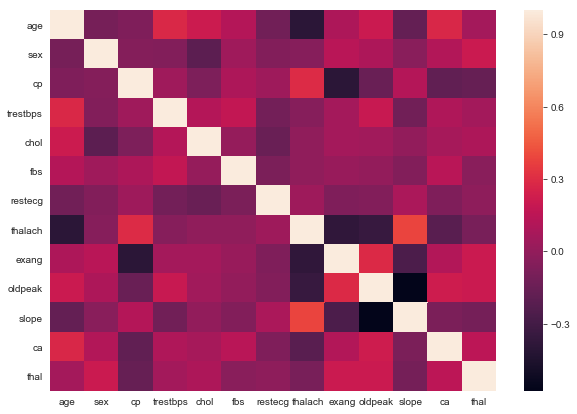

In [18]:
# Run the models again without preprocessing the data
X = df[df.columns[:-1]]
y = df.target

# heatmap with correlation 
corrmat = X.corr()
sns.heatmap(corrmat)
plt.show()

In [19]:
# Store scores
log_scores = []

for i in range(1,10000, 100):
    # initialize Logistic Regression
    logreg = linear_model.LogisticRegression(C=i)

    # Fit the model
    logreg.fit(X, y)

    # Score with 10=k folds
    logreg_score = cross_val_score(logreg, X, y, cv= 10)
    coef = logreg.coef_
    intercept = logreg.intercept_
    print('C:', i)
    print('All R-Squares:', logreg_score)
    print('R-Squared:', logreg_score.mean())
    print('intercept:', intercept)
    log_scores.append((logreg_score.mean(), i))
    print()

    # Display feature coefficients
    coef_df = pd.DataFrame(X.columns)
    coef_df.columns = ['Features']
    coef_df['Coef'] = coef.reshape(-1,1)
    print(coef_df)

C: 1
All R-Squares: [0.87096774 0.80645161 0.83870968 0.87096774 0.90322581 0.8
 0.83333333 0.9        0.68965517 0.72413793]
R-Squared: 0.8237449017426769
intercept: [0.40801578]

    Features      Coef
0        age  0.009043
1        sex -1.377613
2         cp  0.802448
3   trestbps -0.015461
4       chol -0.003290
5        fbs -0.010097
6    restecg  0.459803
7    thalach  0.029403
8      exang -0.784186
9    oldpeak -0.508439
10     slope  0.519474
11        ca -0.729614
12      thal -0.802396
C: 101
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [3.21306116]

    Features      Coef
0        age -0.003728
1        sex -1.743147
2         cp  0.858345
3   trestbps -0.019176
4       chol -0.004552
5        fbs  0.029792
6    restecg  0.469647
7    thalach  0.023754
8      exang -0.970562
9    oldpeak -0.537200
10     slope  0.580284
11        ca -0.772380
12      

C: 1701
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [3.40806367]

    Features      Coef
0        age -0.004698
1        sex -1.756952
2         cp  0.859803
3   trestbps -0.019430
4       chol -0.004617
5        fbs  0.035425
6    restecg  0.467716
7    thalach  0.023316
8      exang -0.977787
9    oldpeak -0.539573
10     slope  0.580338
11        ca -0.773218
12      thal -0.900086
C: 1801
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [3.41868345]

    Features      Coef
0        age -0.004749
1        sex -1.752091
2         cp  0.859682
3   trestbps -0.019433
4       chol -0.004611
5        fbs  0.033993
6    restecg  0.466233
7    thalach  0.023258
8      exang -0.977917
9    oldpeak -0.540406
10     slope  0.578796
11        ca -0.7735

C: 3301
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [3.43385921]

    Features      Coef
0        age -0.004878
1        sex -1.756812
2         cp  0.858859
3   trestbps -0.019450
4       chol -0.004625
5        fbs  0.033982
6    restecg  0.465617
7    thalach  0.023237
8      exang -0.978830
9    oldpeak -0.538867
10     slope  0.579871
11        ca -0.772209
12      thal -0.898923
C: 3401
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [3.41603777]

    Features      Coef
0        age -0.004739
1        sex -1.754353
2         cp  0.860056
3   trestbps -0.019434
4       chol -0.004617
5        fbs  0.032178
6    restecg  0.466126
7    thalach  0.023273
8      exang -0.977604
9    oldpeak -0.539849
10     slope  0.579797
11        ca -0.7734

C: 4901
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [3.43561076]

    Features      Coef
0        age -0.004886
1        sex -1.756911
2         cp  0.858870
3   trestbps -0.019452
4       chol -0.004626
5        fbs  0.033984
6    restecg  0.465589
7    thalach  0.023234
8      exang -0.978846
9    oldpeak -0.538906
10     slope  0.579829
11        ca -0.772207
12      thal -0.898957
C: 5001
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [3.32888947]

    Features      Coef
0        age -0.004289
1        sex -1.752619
2         cp  0.858581
3   trestbps -0.019324
4       chol -0.004589
5        fbs  0.036824
6    restecg  0.469935
7    thalach  0.023505
8      exang -0.975802
9    oldpeak -0.538865
10     slope  0.581590
11        ca -0.7732

C: 6501
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [3.28463881]

    Features      Coef
0        age -0.004059
1        sex -1.750545
2         cp  0.857973
3   trestbps -0.019270
4       chol -0.004577
5        fbs  0.037229
6    restecg  0.470983
7    thalach  0.023612
8      exang -0.975187
9    oldpeak -0.537890
10     slope  0.581798
11        ca -0.773539
12      thal -0.898909
C: 6601
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [3.44576104]

    Features      Coef
0        age -0.004888
1        sex -1.756838
2         cp  0.859631
3   trestbps -0.019468
4       chol -0.004626
5        fbs  0.035106
6    restecg  0.466197
7    thalach  0.023214
8      exang -0.979806
9    oldpeak -0.540218
10     slope  0.579135
11        ca -0.7732

C: 8101
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [3.43550678]

    Features      Coef
0        age -0.004838
1        sex -1.755458
2         cp  0.859811
3   trestbps -0.019457
4       chol -0.004622
5        fbs  0.035111
6    restecg  0.465973
7    thalach  0.023235
8      exang -0.978657
9    oldpeak -0.540425
10     slope  0.578781
11        ca -0.773351
12      thal -0.899833
C: 8201
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [3.33452408]

    Features      Coef
0        age -0.004328
1        sex -1.754612
2         cp  0.859176
3   trestbps -0.019337
4       chol -0.004594
5        fbs  0.037575
6    restecg  0.469377
7    thalach  0.023500
8      exang -0.976925
9    oldpeak -0.538389
10     slope  0.581466
11        ca -0.7727

C: 9701
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [3.38068241]

    Features      Coef
0        age -0.004544
1        sex -1.755500
2         cp  0.859201
3   trestbps -0.019387
4       chol -0.004608
5        fbs  0.034955
6    restecg  0.467746
7    thalach  0.023391
8      exang -0.976879
9    oldpeak -0.539916
10     slope  0.580370
11        ca -0.773209
12      thal -0.900493
C: 9801
All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
R-Squared: 0.8104041527623286
intercept: [3.36432319]

    Features      Coef
0        age -0.004463
1        sex -1.754456
2         cp  0.859009
3   trestbps -0.019367
4       chol -0.004602
5        fbs  0.035580
6    restecg  0.468548
7    thalach  0.023426
8      exang -0.976681
9    oldpeak -0.539535
10     slope  0.580692
11        ca -0.7731

In [20]:
# Store scores 
ridge_scores = []

# initialize ridge
for i in range(1,50):
    ridge = linear_model.LogisticRegression(penalty='l2', C=i)

    # Fit lasso
    ridge.fit(X, y)

    # test and look at scores
    ridge_score = cross_val_score(ridge, X, y, cv=10)

    print('Iteration:', i, '\nC of:', i)
    print('All Scores:', ridge_score)
    print('score:', ridge_score.mean())
    print('intercept:', ridge.intercept_)
    print()
    ridge_scores.append((ridge_score.mean(), i))
    coef_df = pd.DataFrame(X.columns)
    coef_df.columns = ['Features']
    coef_df['Coef'] = ridge.coef_.reshape(-1,1)
    print(coef_df)
    print()

Iteration: 1 
C of: 1
All Scores: [0.87096774 0.80645161 0.83870968 0.87096774 0.90322581 0.8
 0.83333333 0.9        0.68965517 0.72413793]
score: 0.8237449017426769
intercept: [0.40801578]

    Features      Coef
0        age  0.009043
1        sex -1.377613
2         cp  0.802448
3   trestbps -0.015461
4       chol -0.003290
5        fbs -0.010097
6    restecg  0.459803
7    thalach  0.029403
8      exang -0.784186
9    oldpeak -0.508439
10     slope  0.519474
11        ca -0.729614
12      thal -0.802396

Iteration: 2 
C of: 2
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.90322581 0.8
 0.83333333 0.9        0.68965517 0.72413793]
score: 0.8269707081942899
intercept: [0.76134103]

    Features      Coef
0        age  0.007970
1        sex -1.506261
2         cp  0.825009
3   trestbps -0.016010
4       chol -0.003577
5        fbs -0.009530
6    restecg  0.485635
7    thalach  0.029098
8      exang -0.842043
9    oldpeak -0.511176
10     slope  0.554155
11        ca -0.748

Iteration: 17 
C of: 17
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.87096774 0.73333333
 0.83333333 0.9        0.68965517 0.72413793]
score: 0.8170782350760103
intercept: [2.46160722]

    Features      Coef
0        age  0.000005
1        sex -1.699719
2         cp  0.851951
3   trestbps -0.018228
4       chol -0.004303
5        fbs  0.020769
6    restecg  0.483654
7    thalach  0.025535
8      exang -0.943683
9    oldpeak -0.528138
10     slope  0.580298
11        ca -0.768307
12      thal -0.879691

Iteration: 18 
C of: 18
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.87096774 0.73333333
 0.83333333 0.9        0.68965517 0.72413793]
score: 0.8170782350760103
intercept: [2.50092358]

    Features      Coef
0        age -0.000190
1        sex -1.702318
2         cp  0.852211
3   trestbps -0.018276
4       chol -0.004317
5        fbs  0.021875
6    restecg  0.482568
7    thalach  0.025435
8      exang -0.945728
9    oldpeak -0.528149
10     slope  0.581374
1

Iteration: 33 
C of: 33
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.9        0.68965517 0.72413793]
score: 0.8171857619577307
intercept: [2.83325875]

    Features      Coef
0        age -0.001853
1        sex -1.727228
2         cp  0.856268
3   trestbps -0.018709
4       chol -0.004444
5        fbs  0.026069
6    restecg  0.475427
7    thalach  0.024657
8      exang -0.957073
9    oldpeak -0.532393
10     slope  0.583069
11        ca -0.770943
12      thal -0.884592

Iteration: 34 
C of: 34
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.9        0.68965517 0.72413793]
score: 0.8171857619577307
intercept: [2.86360715]

    Features      Coef
0        age -0.001986
1        sex -1.724185
2         cp  0.855197
3   trestbps -0.018733
4       chol -0.004439
5        fbs  0.026736
6    restecg  0.475758
7    thalach  0.024596
8      exang -0.958358
9    oldpeak -0.532816
10     slope  0.580287
1

Iteration: 49 
C of: 49
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.72413793]
score: 0.8138524286243974
intercept: [3.01415045]

    Features      Coef
0        age -0.002717
1        sex -1.734697
2         cp  0.856459
3   trestbps -0.018918
4       chol -0.004492
5        fbs  0.028071
6    restecg  0.473205
7    thalach  0.024251
8      exang -0.964493
9    oldpeak -0.535270
10     slope  0.580681
11        ca -0.771531
12      thal -0.891918



In [21]:
# initialize lasso
lasso_scores = []

for i in range(1,50):
    lasso = linear_model.LogisticRegression(penalty='l1', C=i/10)

    # Fit lasso
    lasso.fit(X, y)

    # test and look at scores
    
    lasso_score = cross_val_score(lasso, X, y, cv=10)
    print('iteration:', i, '\nC of:', i/10)
    print('All Scores:', lasso_score)
    print('score:', lasso_score.mean())
    print('intercept:', lasso.intercept_)
    print('number of features retained:', (lasso.coef_ != 0).sum())
    print()
    lasso_scores.append((lasso_score.mean(), i))
    coef_df = pd.DataFrame(X.columns)
    coef_df.columns = ['Features']
    coef_df['Coef'] = lasso.coef_.reshape(-1,1)
    print(coef_df)
    print()

iteration: 1 
C of: 0.1
All Scores: [0.83870968 0.70967742 0.83870968 0.90322581 0.87096774 0.7
 0.83333333 0.9        0.65517241 0.72413793]
score: 0.7973934000741564
intercept: [0.]
number of features retained: 8

    Features      Coef
0        age  0.000000
1        sex -0.457191
2         cp  0.601919
3   trestbps -0.016131
4       chol -0.002803
5        fbs  0.000000
6    restecg  0.000000
7    thalach  0.029618
8      exang  0.000000
9    oldpeak -0.469608
10     slope  0.000000
11        ca -0.457787
12      thal -0.392942

iteration: 2 
C of: 0.2
All Scores: [0.83870968 0.74193548 0.87096774 0.90322581 0.90322581 0.76666667
 0.83333333 0.93333333 0.68965517 0.72413793]
score: 0.8205190952910641
intercept: [0.]
number of features retained: 12

    Features      Coef
0        age  0.004174
1        sex -0.904754
2         cp  0.673748
3   trestbps -0.014465
4       chol -0.003211
5        fbs  0.000000
6    restecg  0.004253
7    thalach  0.031025
8      exang -0.321503
9    ol

iteration: 17 
C of: 1.7
All Scores: [0.87096774 0.77419355 0.83870968 0.87096774 0.90322581 0.8
 0.83333333 0.9        0.68965517 0.72413793]
score: 0.8205190952910641
intercept: [0.]
number of features retained: 12

    Features      Coef
0        age  0.011220
1        sex -1.514542
2         cp  0.814711
3   trestbps -0.015008
4       chol -0.003485
5        fbs  0.000000
6    restecg  0.460135
7    thalach  0.031439
8      exang -0.804434
9    oldpeak -0.493497
10     slope  0.541609
11        ca -0.737305
12      thal -0.795349

iteration: 18 
C of: 1.8
All Scores: [0.87096774 0.77419355 0.83870968 0.87096774 0.90322581 0.8
 0.83333333 0.9        0.68965517 0.72413793]
score: 0.8205190952910641
intercept: [0.]
number of features retained: 12

    Features      Coef
0        age  0.011297
1        sex -1.521007
2         cp  0.816436
3   trestbps -0.015023
4       chol -0.003491
5        fbs  0.000000
6    restecg  0.464554
7    thalach  0.031460
8      exang -0.809108
9    oldpea

iteration: 32 
C of: 3.2
All Scores: [0.87096774 0.80645161 0.83870968 0.87096774 0.90322581 0.8
 0.83333333 0.9        0.68965517 0.72413793]
score: 0.8237449017426769
intercept: [1.33033817]
number of features retained: 12

    Features      Coef
0        age  0.005108
1        sex -1.610676
2         cp  0.833165
3   trestbps -0.016697
4       chol -0.003931
5        fbs  0.000000
6    restecg  0.466401
7    thalach  0.028225
8      exang -0.874717
9    oldpeak -0.511125
10     slope  0.558692
11        ca -0.750753
12      thal -0.838760

iteration: 33 
C of: 3.3
All Scores: [0.87096774 0.80645161 0.83870968 0.87096774 0.90322581 0.8
 0.83333333 0.9        0.68965517 0.72413793]
score: 0.8237449017426769
intercept: [1.39723317]
number of features retained: 12

    Features      Coef
0        age  0.004789
1        sex -1.614786
2         cp  0.833939
3   trestbps -0.016779
4       chol -0.003952
5        fbs  0.000000
6    restecg  0.466213
7    thalach  0.028059
8      exang -0.87

iteration: 47 
C of: 4.7
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.90322581 0.76666667
 0.83333333 0.9        0.68965517 0.72413793]
score: 0.8236373748609566
intercept: [1.96269532]
number of features retained: 12

    Features      Coef
0        age  0.002163
1        sex -1.653319
2         cp  0.841328
3   trestbps -0.017509
4       chol -0.004142
5        fbs  0.000000
6    restecg  0.466239
7    thalach  0.026722
8      exang -0.905297
9    oldpeak -0.519909
10     slope  0.564032
11        ca -0.756605
12      thal -0.858129

iteration: 48 
C of: 4.8
All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.90322581 0.76666667
 0.83333333 0.9        0.68965517 0.72413793]
score: 0.8236373748609566
intercept: [1.99588758]
number of features retained: 12

    Features      Coef
0        age  0.002002
1        sex -1.655414
2         cp  0.841709
3   trestbps -0.017549
4       chol -0.004153
5        fbs  0.000000
6    restecg  0.466141
7    thalach  0.026641
8   

In [22]:
log_scores

[(0.8237449017426769, 1),
 (0.8104041527623286, 101),
 (0.8104041527623286, 201),
 (0.8104041527623286, 301),
 (0.8104041527623286, 401),
 (0.8104041527623286, 501),
 (0.8104041527623286, 601),
 (0.8104041527623286, 701),
 (0.8104041527623286, 801),
 (0.8104041527623286, 901),
 (0.8104041527623286, 1001),
 (0.8104041527623286, 1101),
 (0.8104041527623286, 1201),
 (0.8104041527623286, 1301),
 (0.8104041527623286, 1401),
 (0.8104041527623286, 1501),
 (0.8104041527623286, 1601),
 (0.8104041527623286, 1701),
 (0.8104041527623286, 1801),
 (0.8104041527623286, 1901),
 (0.8104041527623286, 2001),
 (0.8104041527623286, 2101),
 (0.8104041527623286, 2201),
 (0.8104041527623286, 2301),
 (0.8104041527623286, 2401),
 (0.8104041527623286, 2501),
 (0.8104041527623286, 2601),
 (0.8138524286243974, 2701),
 (0.8104041527623286, 2801),
 (0.8104041527623286, 2901),
 (0.8104041527623286, 3001),
 (0.8104041527623286, 3101),
 (0.8104041527623286, 3201),
 (0.8104041527623286, 3301),
 (0.8104041527623286, 3401

In [23]:
ridge_scores

[(0.8237449017426769, 1),
 (0.8269707081942899, 2),
 (0.8204115684093436, 3),
 (0.8204115684093436, 4),
 (0.8204115684093436, 5),
 (0.8204115684093436, 6),
 (0.8138524286243974, 7),
 (0.8138524286243974, 8),
 (0.8170782350760103, 9),
 (0.8170782350760103, 10),
 (0.8170782350760103, 11),
 (0.8170782350760103, 12),
 (0.8170782350760103, 13),
 (0.8170782350760103, 14),
 (0.8170782350760103, 15),
 (0.8170782350760103, 16),
 (0.8170782350760103, 17),
 (0.8170782350760103, 18),
 (0.8170782350760103, 19),
 (0.8171857619577307, 20),
 (0.8171857619577307, 21),
 (0.8171857619577307, 22),
 (0.8171857619577307, 23),
 (0.8171857619577307, 24),
 (0.8171857619577307, 25),
 (0.8171857619577307, 26),
 (0.8171857619577307, 27),
 (0.8171857619577307, 28),
 (0.8171857619577307, 29),
 (0.8171857619577307, 30),
 (0.8171857619577307, 31),
 (0.8171857619577307, 32),
 (0.8171857619577307, 33),
 (0.8171857619577307, 34),
 (0.8171857619577307, 35),
 (0.8171857619577307, 36),
 (0.8171857619577307, 37),
 (0.817185

In [24]:
lasso_scores

[(0.7973934000741564, 1),
 (0.8205190952910641, 2),
 (0.8205190952910641, 3),
 (0.8205190952910641, 4),
 (0.8238524286243974, 5),
 (0.8270782350760102, 6),
 (0.8303040415276233, 7),
 (0.8303040415276233, 8),
 (0.8303040415276233, 9),
 (0.8303040415276233, 10),
 (0.8270782350760102, 11),
 (0.8205190952910641, 12),
 (0.8205190952910641, 13),
 (0.8205190952910641, 14),
 (0.8205190952910641, 15),
 (0.8205190952910641, 16),
 (0.8205190952910641, 17),
 (0.8205190952910641, 18),
 (0.8205190952910641, 19),
 (0.8205190952910641, 20),
 (0.8205190952910641, 21),
 (0.8205190952910641, 22),
 (0.8205190952910641, 23),
 (0.8205190952910641, 24),
 (0.8205190952910641, 25),
 (0.8205190952910641, 26),
 (0.8205190952910641, 27),
 (0.8205190952910641, 28),
 (0.8205190952910641, 29),
 (0.8205190952910641, 30),
 (0.8237449017426769, 31),
 (0.8237449017426769, 32),
 (0.8237449017426769, 33),
 (0.8237449017426769, 34),
 (0.8204115684093436, 35),
 (0.8236373748609566, 36),
 (0.8236373748609566, 37),
 (0.823637